# Loading Perceptron

In [51]:
%load_ext autoreload
%autoreload 2
from perceptron import Perceptron, PerceptronOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Testing That Our Perceptron Algorithim Works

Lets run a training loop to check that our Peceptron algorithim is running as expected and will eventually achieve a loss equal to 0 on linearly separable data. First we will need to generate linearly separable data. 

In [ ]:
from matplotlib import pyplot as plt
import torch
plt.style.use('seaborn-v0_8-whitegrid')

torch.manual_seed(1234)

# first we need to generate data

def perceptron_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    
    return X, y

# assign the example data to variables
X, y = perceptron_data(n_points = 300, noise = 0.2)

def plot_perceptron_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = 2*y[ix]-1, facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

Now that we have generated linearly separable data, lets visualize before we begin implementing linear decision boundaries.

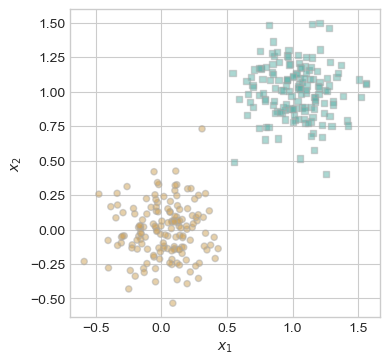

In [53]:
# Visualize our training data
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
X, y = perceptron_data()
plot_perceptron_data(X, y, ax)

Time to initiate our training model to test whether or not our Perceptron Algorithim can achieve a loss of 0. 

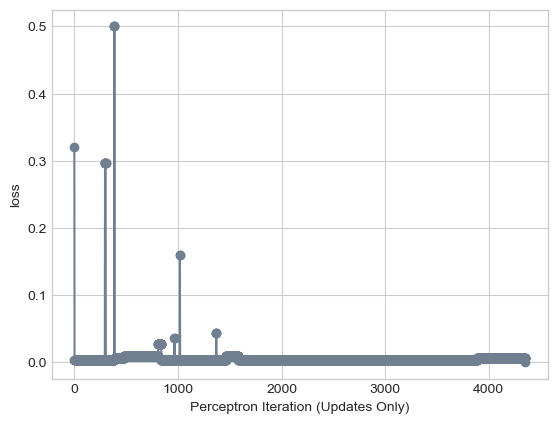

In [54]:
# instantiate a model and an optimizer
p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]

while loss > 0: # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,)).item()
    x_i = X[i].unsqueeze(0)
    y_i = y[i]
    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)

plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")

Although it took a large number of iterations, our perceptron algorithim was eventually able to reach a loss of 0 and is able to identify the proper weight vector to linearly separate the data points. Lets look at our data with the final weight vector plotted.

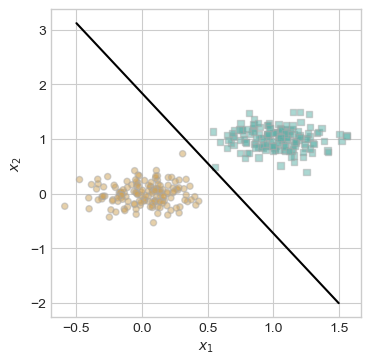

In [58]:
# define a function to plot a line
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

# plot the existing data and add a line to the graph
fig, ax = plt.subplots(1, 1, figsize = (4, 4))

plot_perceptron_data(X, y, ax)
draw_line(p.w, -.5, 1.5, ax, color = "black")